# Regression approaches for modeling neural responses and stimulus decoding

## 1. Nonparametric estimation of spike responses is straightforward in low-dimensional cases

In [176]:
import numpy as np

n_points = 1000
times = np.linspace(0, 1, 100)

Draw spikes from two gaussian distributions, one centered at $t=0.2$ and having $0.3 * \textrm{n_points}$, and the other centered at $0.8$ and having $0.7 * \textrm{n_points}$ points

In [177]:
spikes = np.concatenate((np.random.normal(0.2, .2, 0.3 * n_points),
                         np.random.normal(0.8, .2, 0.7 * n_points)))[:, np.newaxis]

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


Fit a gaussian kernel density estimation

In [178]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(kernel='gaussian', bandwidth=.1).fit(spikes)

Plot the obtained pdf

In [179]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

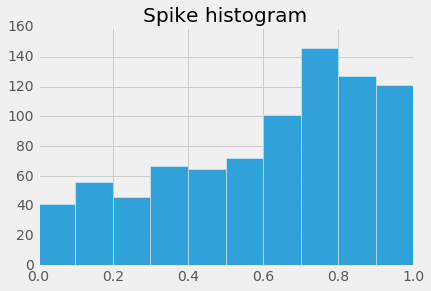

In [180]:
plt.hist(spikes, range=[0, 1])
plt.title('Spike histogram')

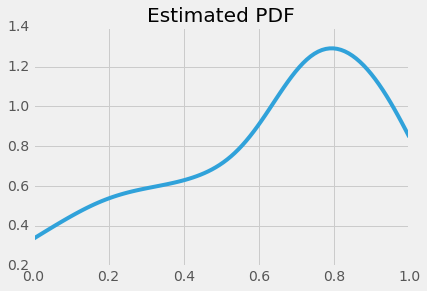

In [181]:
log_density = kde.score_samples(times[:, np.newaxis])
plt.plot(times, np.exp(log_density))
plt.title('Estimated PDF')

## 2. Multiple linear regression provides the simplest approach for modeling the firing rate given higher-dimensional stimuli

We start from a direct model of the form $y = Ax + b + \epsilon$, supposing stimuli of dimension 10

KeyboardInterrupt: 

In [193]:
np.meshgrid([one_dimension] * 2)

[array([ 0.        ,  0.01010101,  0.02020202,  0.03030303,  0.04040404,
         0.05050505,  0.06060606,  0.07070707,  0.08080808,  0.09090909,
         0.1010101 ,  0.11111111,  0.12121212,  0.13131313,  0.14141414,
         0.15151515,  0.16161616,  0.17171717,  0.18181818,  0.19191919,
         0.2020202 ,  0.21212121,  0.22222222,  0.23232323,  0.24242424,
         0.25252525,  0.26262626,  0.27272727,  0.28282828,  0.29292929,
         0.3030303 ,  0.31313131,  0.32323232,  0.33333333,  0.34343434,
         0.35353535,  0.36363636,  0.37373737,  0.38383838,  0.39393939,
         0.4040404 ,  0.41414141,  0.42424242,  0.43434343,  0.44444444,
         0.45454545,  0.46464646,  0.47474747,  0.48484848,  0.49494949,
         0.50505051,  0.51515152,  0.52525253,  0.53535354,  0.54545455,
         0.55555556,  0.56565657,  0.57575758,  0.58585859,  0.5959596 ,
         0.60606061,  0.61616162,  0.62626263,  0.63636364,  0.64646465,
         0.65656566,  0.66666667,  0.67676768,  0.6

In [ ]:
from sklearn.linear_models import RidgeCV